# 임베딩

구조화되어있지 않는 특성들을 머신러닝 작업에 사용하기 위해서는 특성 벡터 표현이 필요하다.    
실제값으로 표현된 특성 벡터 표현을 _임베딩_ 이라고 부른다.

임베딩 : 고차원벡터를 저차원 공간으로 변환하는 것이다.

https://cloud.google.com/architecture/overview-extracting-and-serving-feature-embeddings-for-machine-learning?hl=ko

## 이미지 임베딩

핵심은 대규모 이미지 데이터 세트에서 이미지 분류 모델을 학습시키는 것이다. 그런 다음 마지막 softmax 분류 기준이 없는 모델을 사용해 입력 테시트에 따라 특징 벡터를 추출한다.    
* 대규모 이미지 데이터 세트 : ImageNet

* face recognition 모듈을 이용한 얼굴 인식    
https://github.com/ageitgey/face_recognition

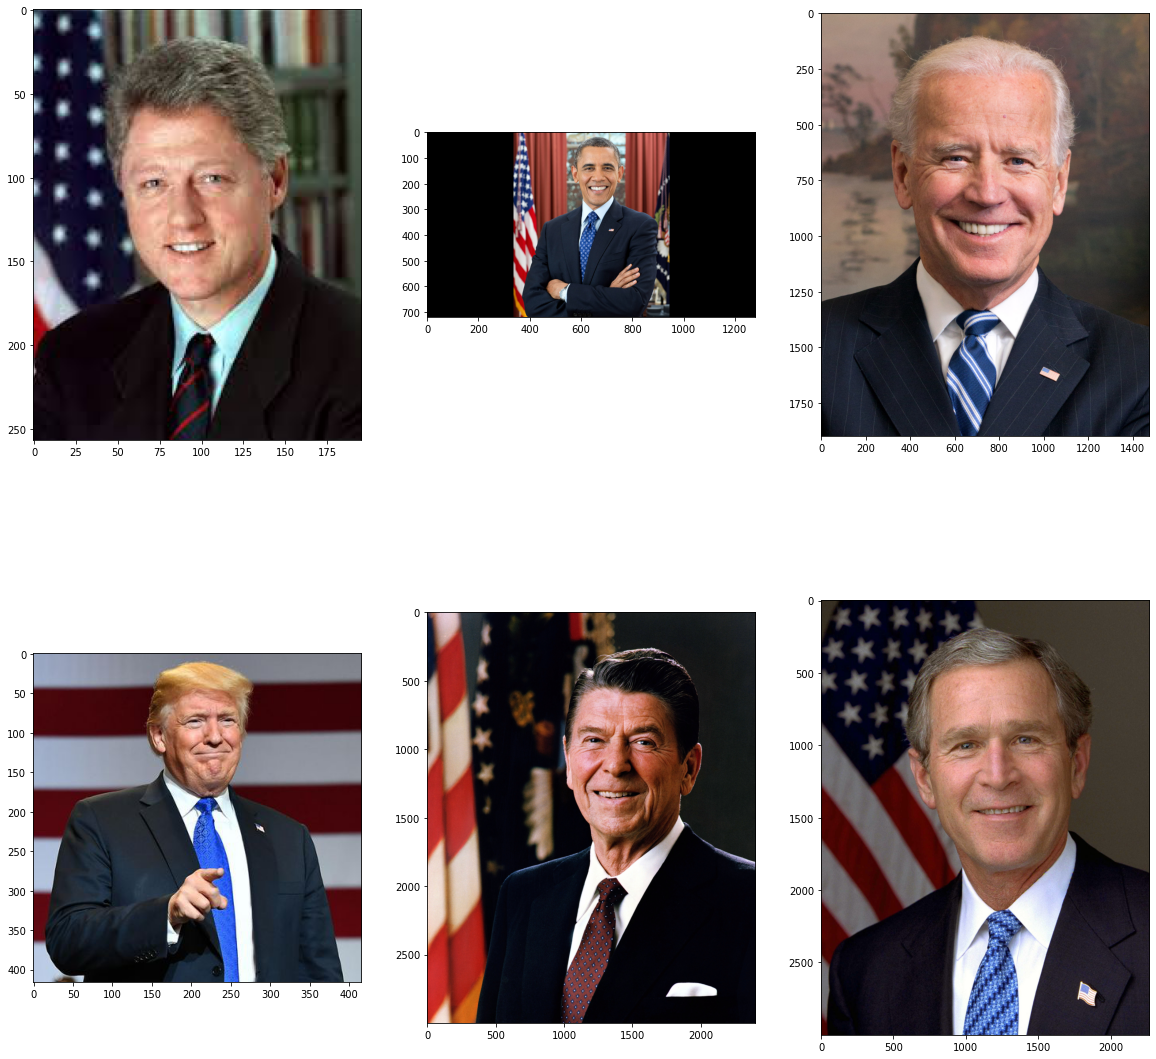

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

image_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(image_dir_path)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))

for idx, ax in enumerate(axes.flat):
    image = img.imread(image_dir_path+'/'+file_list[idx])
    ax.imshow(image)
plt.show()

[(76, 135, 166, 46)]


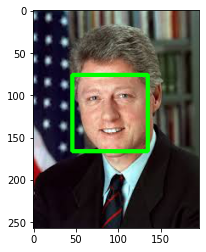

In [15]:
import face_recognition
import cv2

image_name='clinton.jpeg'
image_path = image_dir_path+'/'+image_name
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)
print(face_locations)
# return: A list of tuples of found face locations in css (top, right, bottom, left) order
top, right, bottom, left = face_locations[0]
image_test = image.copy()
cv2.rectangle(image_test, (left, top), (right, bottom), (0,255,0), 3)
plt.imshow(image_test)

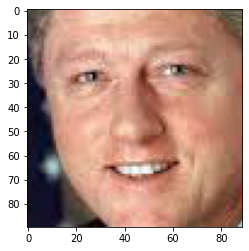

In [16]:
image_cropped_face = image[top:bottom, left:right]
plt.imshow(image_cropped_face)

In [17]:
def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    top, right, bottom, left = face_locations[0]
    return image[top:bottom, left:right]

## 얼굴 임베딩 : FaceNet

FaceNet : 유클리드 공간으로 매핑을 학습하고, triplet loss를 사용한다.

https://arxiv.org/abs/1503.03832

#### triplet loss
triplet loss인 이유는 항상 세개의 이미지를 보기 때문이다.

In [18]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

face = get_cropped_face(image_dir_path+'/'+'clinton.jpeg')
after_embedding = get_face_embedding(face)
after_embedding

[array([-0.04508969,  0.11096706,  0.04037839, -0.02596069, -0.13629276,
         0.05832736, -0.00791329, -0.09079798,  0.07800291, -0.06751928,
         0.07836544, -0.01847955, -0.20820636, -0.01413895,  0.03679249,
         0.08727276, -0.09368371, -0.12994473, -0.13642883, -0.08290243,
        -0.05130973,  0.03095647, -0.07930112,  0.00835842, -0.1596638 ,
        -0.25370046, -0.05857152,  0.00354732,  0.06525847, -0.05510001,
         0.06141135,  0.07477431, -0.18673925, -0.01823538, -0.00579874,
         0.0627984 , -0.11167405, -0.04451566,  0.10954212,  0.03735855,
        -0.18664123,  0.02195602,  0.00140925,  0.2867555 ,  0.26321203,
         0.05795337,  0.03520405, -0.04231023,  0.10563868, -0.25683585,
         0.08387342,  0.10793852,  0.09012961,  0.11464255, -0.06066907,
        -0.10177629,  0.03965353,  0.15413532, -0.19503416,  0.06701506,
         0.10005981, -0.19811633, -0.06047497, -0.00161708,  0.1978557 ,
         0.1070812 , -0.04738703, -0.16971821,  0.1

In [35]:
# 사진 별 임베딩을 해서 dictionary형태로 저장
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict={}
    for file in file_list:
        # person_name = file.split('.')[0]
        person_name = os.path.splitext(file)[0] # 확장자를 제거한 파일 이름만 가져온다.
        face = get_cropped_face(dir_path+'/'+file)
        embedding = get_face_embedding(face)
        # face detect에 실패할 경우 embedding은 없는 리스트로 반환된다.
        if len(embedding) >0:
            embedding_dict[person_name] = embedding[0] 
    return embedding_dict

In [36]:
embedding_dict = get_face_embedding_dict(image_dir_path)

In [38]:
import numpy as np
np.linalg.norm(embedding_dict['obama']-embedding_dict['trump'], ord=2)

0.8885117374787042

## Embedding Visualization
https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/